In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
%matplotlib inline 

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# игнорировать warnings и отключить выведение на экран
import warnings; warnings.simplefilter('ignore')

In [59]:
init_notebook_mode(connected = True)
cf.go_offline()

In [2]:
df = pd.read_csv('module2_tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df['total_bill'].max()

50.81

In [5]:
%matplotlib inline

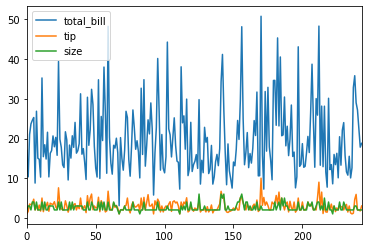

In [6]:
df.plot()

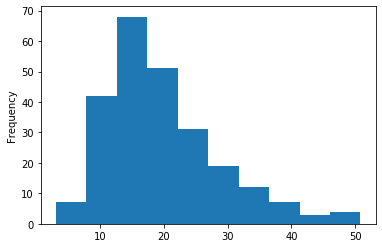

In [7]:
df['total_bill'].plot(kind = 'hist')

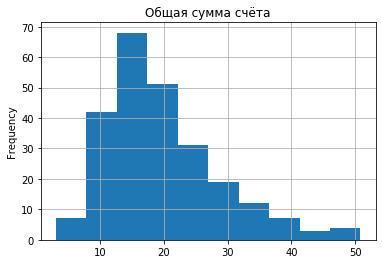

In [8]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

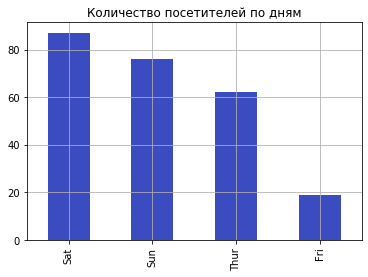

In [9]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

In [10]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean()

sex     smoker
Female  No        2.773519
        Yes       2.931515
Male    No        3.113402
        Yes       3.051167
Name: tip, dtype: float64

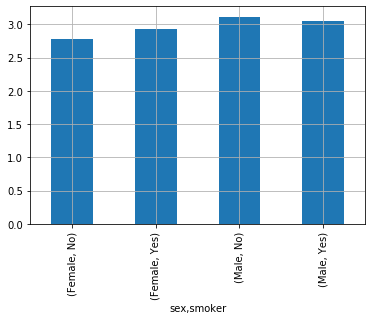

In [11]:
df.groupby(by = ['sex', 'smoker'])['tip'].mean().plot(kind = 'bar', grid= True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A605A0E508>,
      dtype=object)

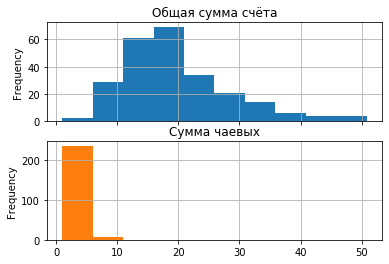

In [12]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, #При установке значения True можно разместить несколько графиков в одной рабочей области:
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

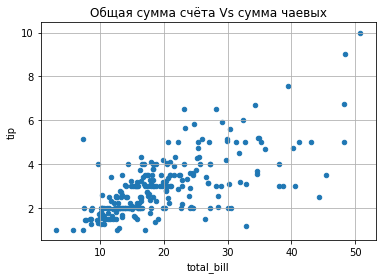

In [13]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', # Тип графика
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

In [14]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [15]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean')

,tip,total_bill
day,,
Fri,2.734737,17.151579
Sat,2.993103,20.441379
Sun,3.255132,21.410000
Thur,2.771452,17.682742


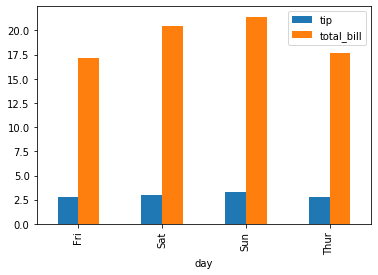

In [16]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

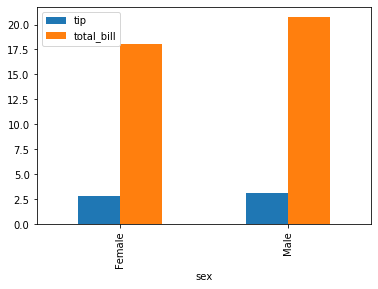

In [17]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'sex', 
               aggfunc = 'mean').plot(kind = 'bar')

In [18]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count')

tip
sex    smoker     
Female No       54
       Yes      33
Male   No       97
       Yes      60

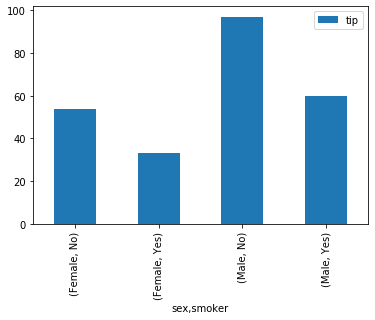

In [19]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

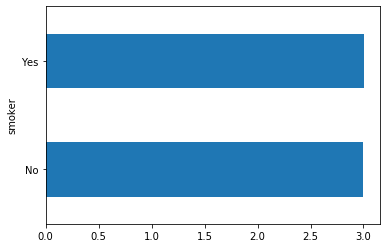

In [20]:
df.groupby('smoker')['tip'].mean().plot(kind = 'barh')

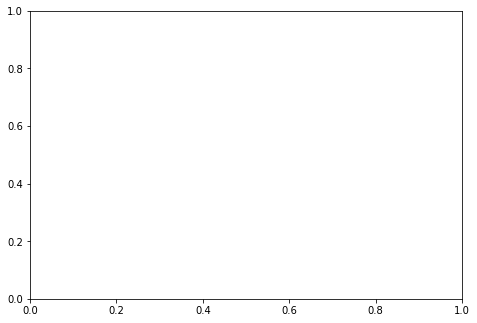

In [21]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

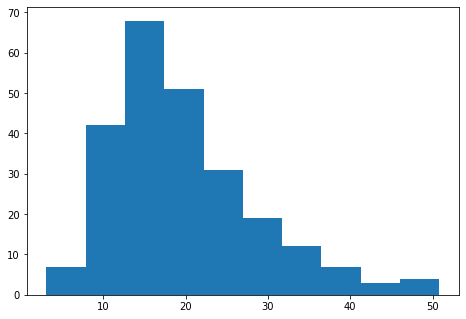

In [22]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

In [23]:
#axes.set_title — заголовок диаграммы;
#axes.set_ylabel — заголовок для оси ординат;
#axes.set_xlabel — заголовок для оси абсцисс.

Text(0.5, 0, 'Сумма заказа, USD')

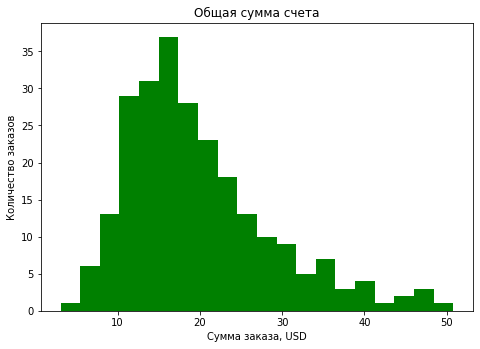

In [24]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], 
          bins = 20, # количество столбцов для демонстрации распределения
          color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

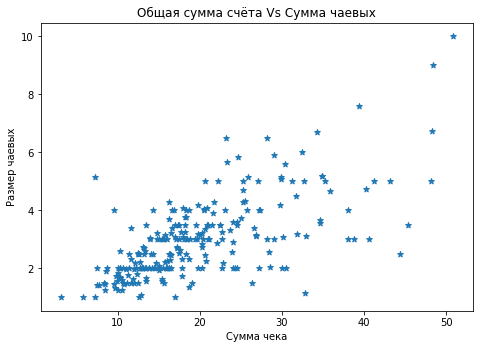

In [25]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = '*')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

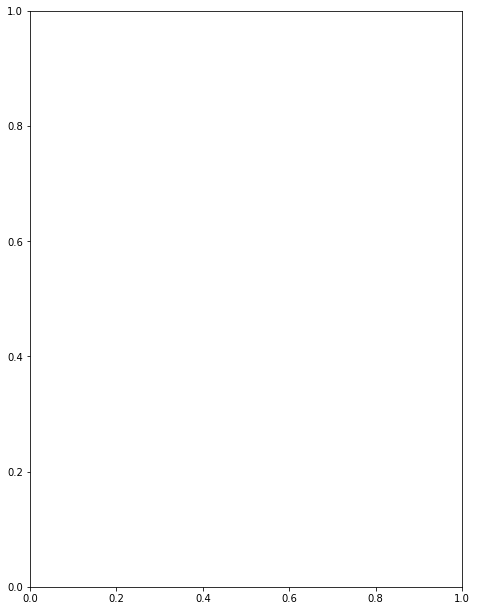

In [26]:
fig = plt.figure()
axes = fig.add_axes([0.1,0.1,1,2])

In [27]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


In [28]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max'])
bills_per_day

,min,max
day,,
Fri,5.75,40.17
Sat,3.07,50.81
Sun,7.25,48.17
Thur,7.51,43.11


In [29]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()
bills_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


<BarContainer object of 4 artists>

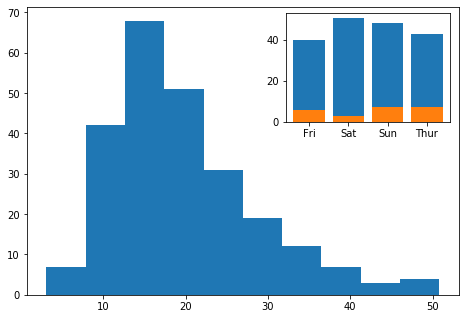

In [30]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'])

<BarContainer object of 4 artists>

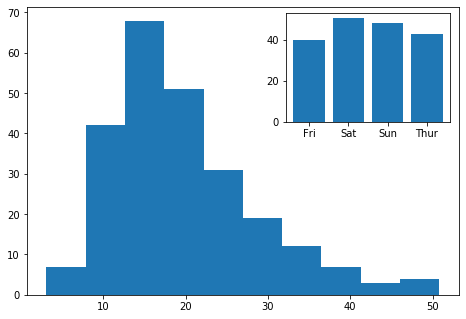

In [31]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'])

<BarContainer object of 4 artists>

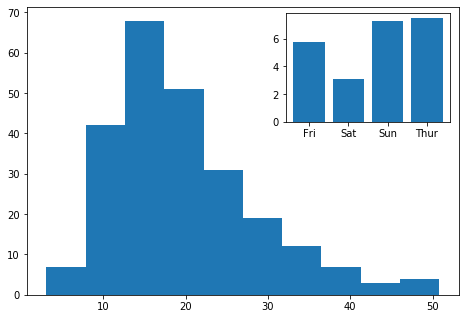

In [32]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'])

<BarContainer object of 4 artists>

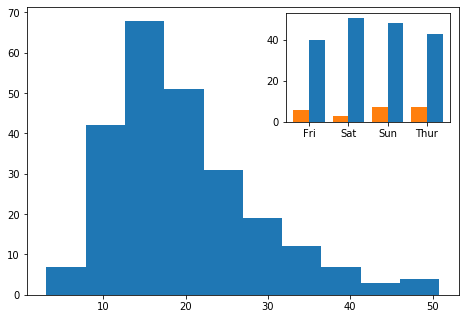

In [33]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge') # add width, align features
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge')

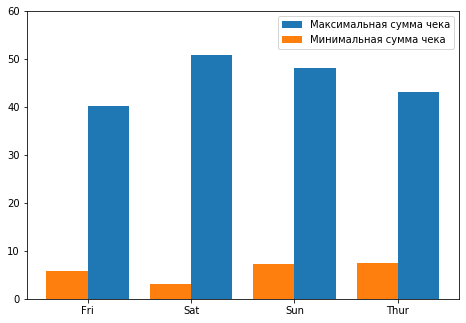

In [34]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека') 
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc=1)

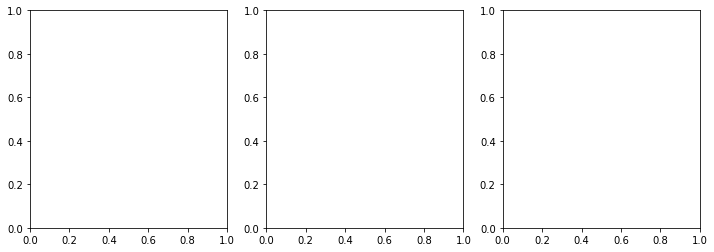

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

Text(0.5, 1.0, 'Общая сумма счета Vs Сумма чаевых')

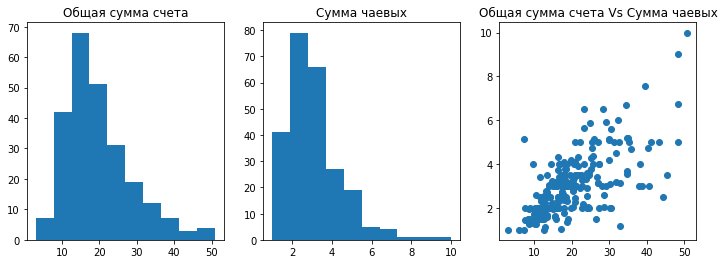

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счета')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x = df['total_bill'], y = df['tip'], marker = 'o')
axes[2].set_title('Общая сумма счета Vs Сумма чаевых')

In [37]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

In [38]:
x

array([-3.        , -2.99399399, -2.98798799, -2.98198198, -2.97597598,
       -2.96996997, -2.96396396, -2.95795796, -2.95195195, -2.94594595,
       -2.93993994, -2.93393393, -2.92792793, -2.92192192, -2.91591592,
       -2.90990991, -2.9039039 , -2.8978979 , -2.89189189, -2.88588589,
       -2.87987988, -2.87387387, -2.86786787, -2.86186186, -2.85585586,
       -2.84984985, -2.84384384, -2.83783784, -2.83183183, -2.82582583,
       -2.81981982, -2.81381381, -2.80780781, -2.8018018 , -2.7957958 ,
       -2.78978979, -2.78378378, -2.77777778, -2.77177177, -2.76576577,
       -2.75975976, -2.75375375, -2.74774775, -2.74174174, -2.73573574,
       -2.72972973, -2.72372372, -2.71771772, -2.71171171, -2.70570571,
       -2.6996997 , -2.69369369, -2.68768769, -2.68168168, -2.67567568,
       -2.66966967, -2.66366366, -2.65765766, -2.65165165, -2.64564565,
       -2.63963964, -2.63363363, -2.62762763, -2.62162162, -2.61561562,
       -2.60960961, -2.6036036 , -2.5975976 , -2.59159159, -2.58

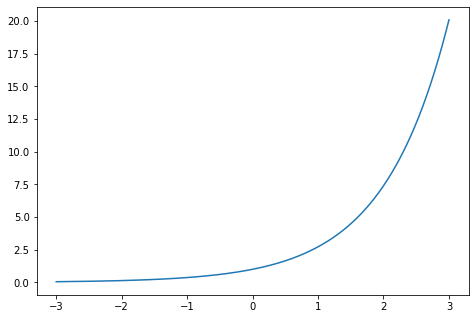

In [39]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

In [40]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

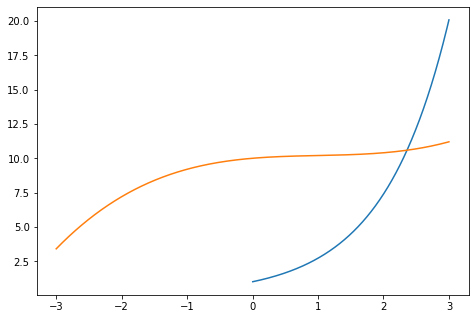

In [41]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

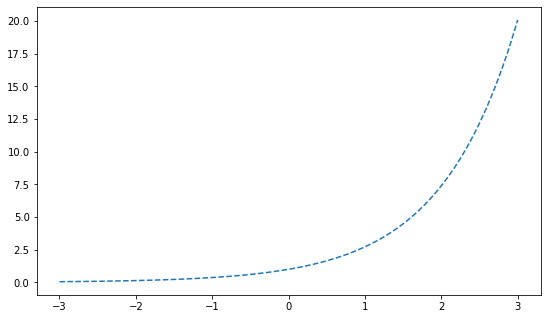

In [42]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

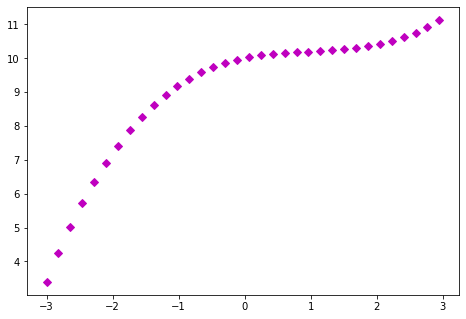

In [43]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

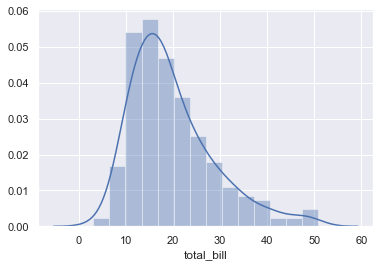

In [44]:
sns.set()
sns.distplot(df['total_bill'])

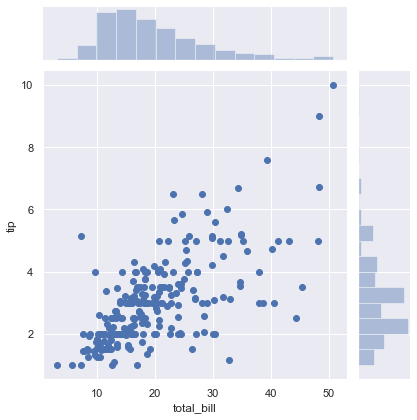

In [45]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df)

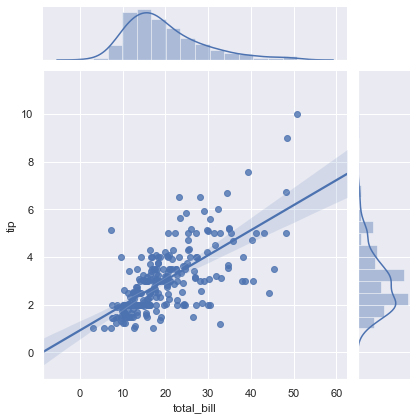

In [46]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

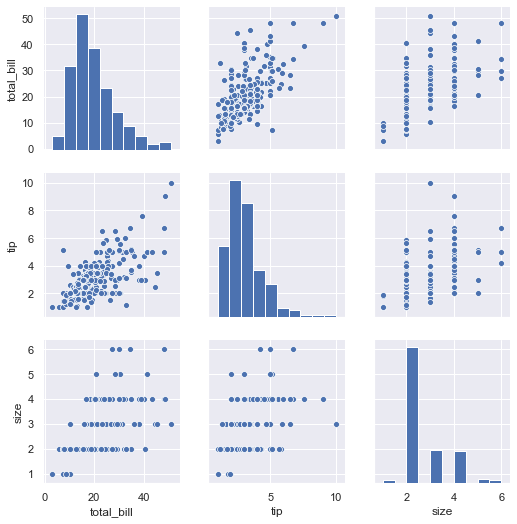

In [47]:
sns.pairplot(df)

In [48]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


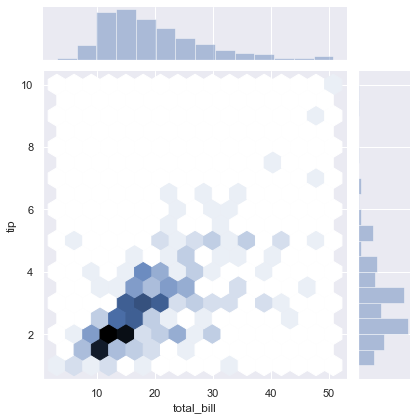

In [49]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'hex')

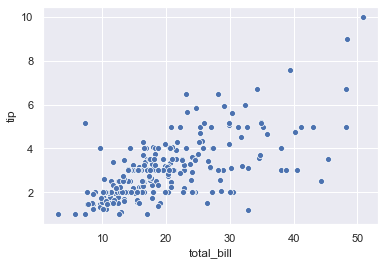

In [67]:
sns.scatterplot(x = 'total_bill', y = 'tip', data = df)

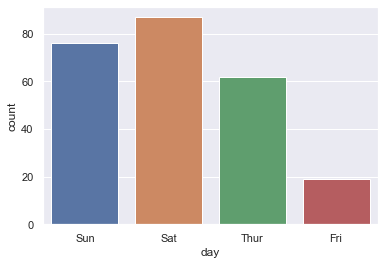

In [50]:
sns.countplot(x = 'day', data = df) # гистограммы распределения категориального признака

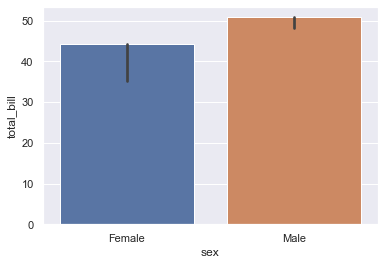

In [51]:
sns.barplot(x = 'sex', y = 'total_bill', estimator=max, data = df)

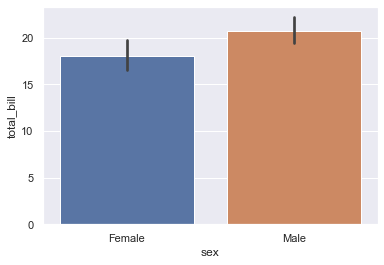

In [52]:
sns.barplot(x = 'sex', y = 'total_bill', data = df)

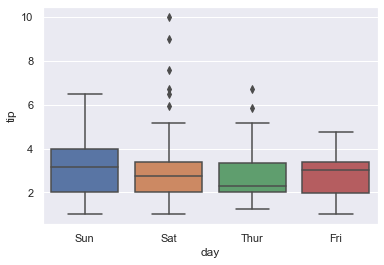

In [53]:
sns.boxplot(x = 'day', y = 'tip', data = df)

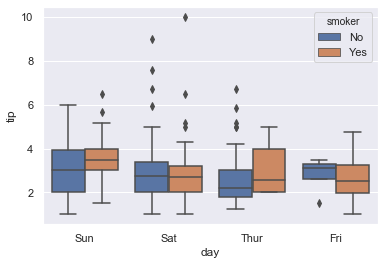

In [54]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

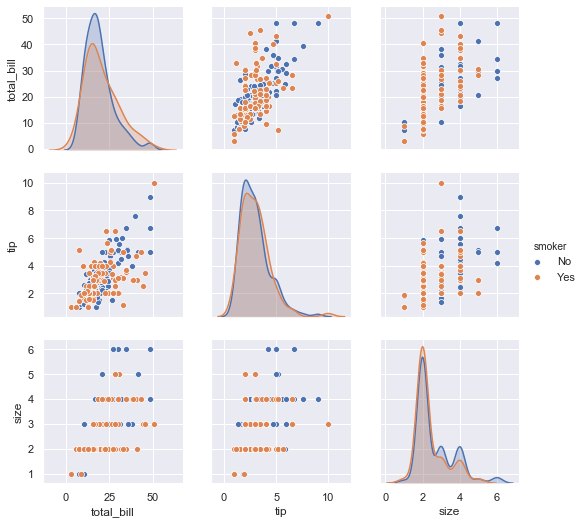

In [55]:
sns.pairplot(df, hue = 'smoker')

In [56]:
correlation = df.corr()

In [57]:
correlation

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


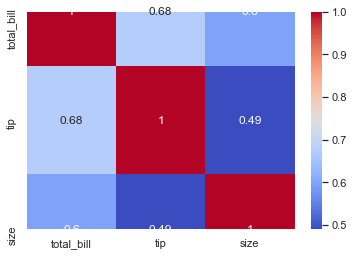

In [58]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')

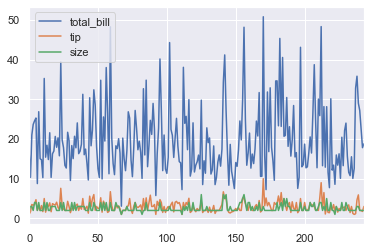

In [60]:
df.plot()

In [61]:
df.iplot()

In [62]:
df[['total_bill', 'tip']].iplot(kind='spread')

In [63]:
df.iplot(kind='bubble', x='total_bill', y='size', size='tip')

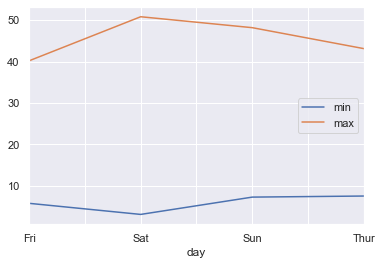

In [65]:
df.groupby(by = 'day')['total_bill'].agg(['min','max']).plot()